<a href="https://www.kaggle.com/code/giovannacenciarelli/python-projeto-final?scriptVersionId=169467142" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [138]:
import pandas as pd

# **Iremos utilizar a planilha "dados" para verificar os indivíduos adimplentes e inadimplentes de um determinado banco. Primeiro, iremos realizar a limpeza de dados.**

In [139]:
df= pd.read_csv('/kaggle/input/dadosgerais/Python_M10_support material.csv')

*Importando dados da planilha p/ o código*

In [140]:
df[df['default']==0].shape #iremos começar definindo as variáveis do nosso dateframe, nesse primeiro, o 0 são os adimplentes

(8500, 16)

In [141]:
df[df['default']==1].shape #inadimplentes

(1627, 16)

In [142]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape 
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [143]:
print(f"A proporcão clientes adimplentes é de  + {round(100 *qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de  + {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de  + 83.93%
A proporcão clientes inadimplentes é de  + 16.07%


In [144]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [145]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


> Agora, iremos realizar a análise dos dados, em seguida, iremos realizar um "limpeza", deixando os dados mais claros a fim de facilitar os nossos códigos

In [146]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [147]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [148]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
 stats_dados_faltantes = []
 for col in df.columns:
  if df[col].isna().any():
   qtd, _ = df[df[col].isna()].shape 
   total, _ =df.shape 
   dict_dados_faltantes = {col:{'quantidade': qtd,"porcentagem": round(100 * qtd/total, 2)}}
   stats_dados_faltantes.append(dict_dados_faltantes)
 for stat in stats_dados_faltantes: print(stat)

In [164]:
stats_dados_faltantes(df=df)

In [165]:
stats_dados_faltantes(df=df[df['default'] == 0])

In [166]:
stats_dados_faltantes(df=df[df['default'] == 1])

Limpando dados

In [152]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [153]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = [
'12.691,51',
'8.256,96',
'3.418,56',
'3.313,03',
'4.716,22'
]
valores_limpos = list(map(fn, valores_originais))
print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [163]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn) 
df['limite_credito'] = df['limite_credito'].apply(fn)

In [162]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [161]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape
df[df['default'] == 0].shape
df[df['default'] == 1].shape

Procedimentos p/ visualizar os dados utilizando seaborn

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [159]:
df_adimplente = df[df['default'] == 0]

In [160]:
df_inadimplente = df[df['default'] == 1]

In [ ]:
df.select_dtypes('object').head(n=5) #visualizando a relação de default x outras variáveis

Agora, aplicando conceitos de análise de dados explorados no curso, iremos gerar gráficos da escolaridade e salário anual.

# **IREMOS GERAR OS NOSSOS PRIMEIROS GRÁFICOS, A PARTIR DOS PANDAS E DO SEABORN, UTILIZANDO CONCEITOS ABORDADOS AO LONGO DO CURSO.**

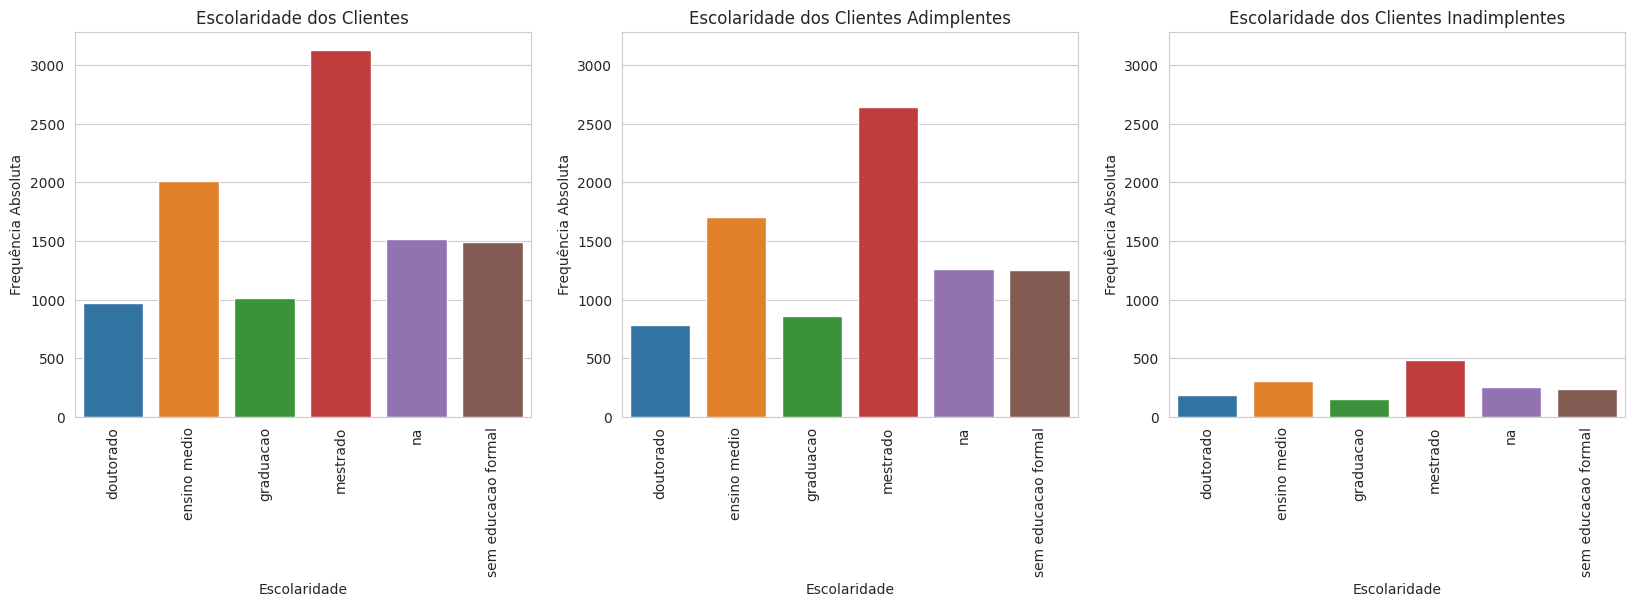

In [155]:
#Gráfico para a análise da escolaridade dos clientes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df' seja o DataFrame principal
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

coluna = "escolaridade"
titulos = ["Escolaridade dos Clientes", "Escolaridade dos Clientes Adimplentes", "Escolaridade dos Clientes Inadimplentes"]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5))

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max(max_y, max_y_f)

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

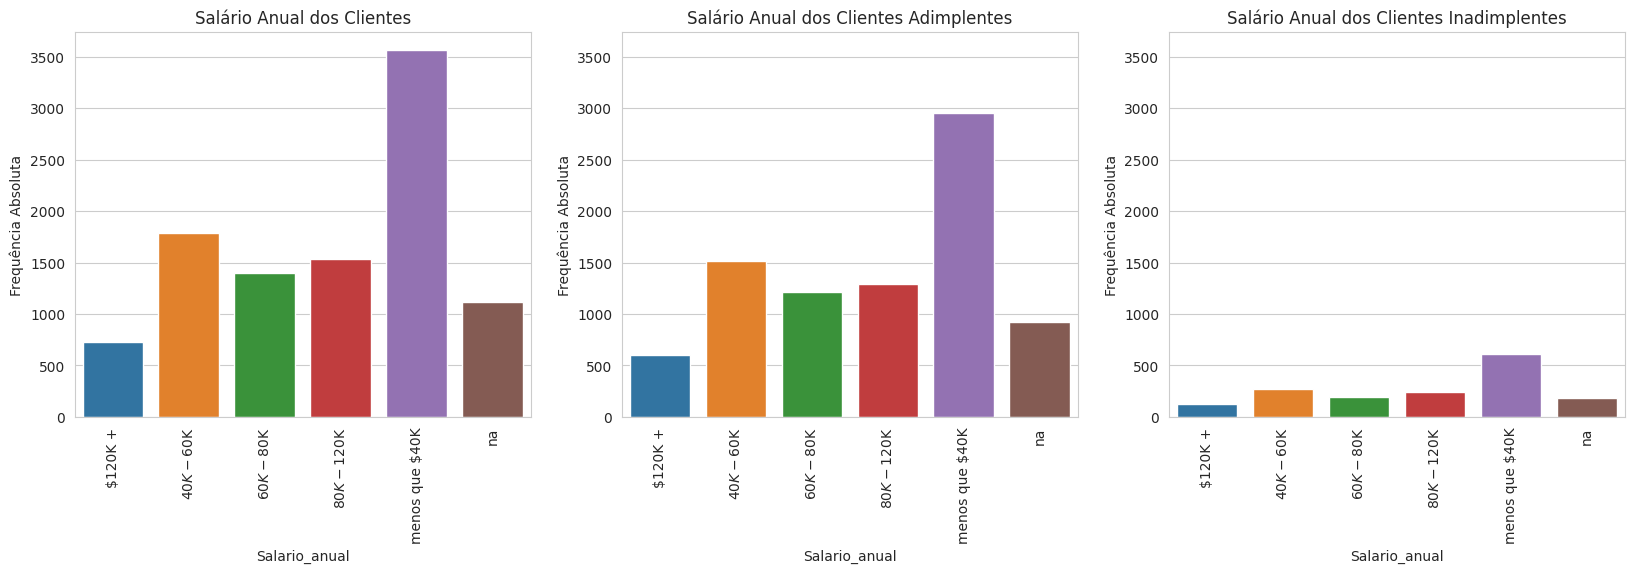

In [156]:
coluna = "salario_anual" #Agora, gerando gráficos do salário anual
titulos = [
    "Salário Anual dos Clientes",
    "Salário Anual dos Clientes Adimplentes",
    "Salário Anual dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

Acima, fizemos as avaliações gráficas, em seguida, realizaremos a análise de dados numérica dos dados apresentados. Em seguida, continuaremos a análise, porém, numérica. Primeiro, sendo a qtd de transações e clientes adimplentes x inadimplentes.

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

/tmp/ipykernel_33/3198726569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adimplente.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_33/3198726569.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inadimplente.replace([np.inf, -np.inf], np.nan, inplace=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureW

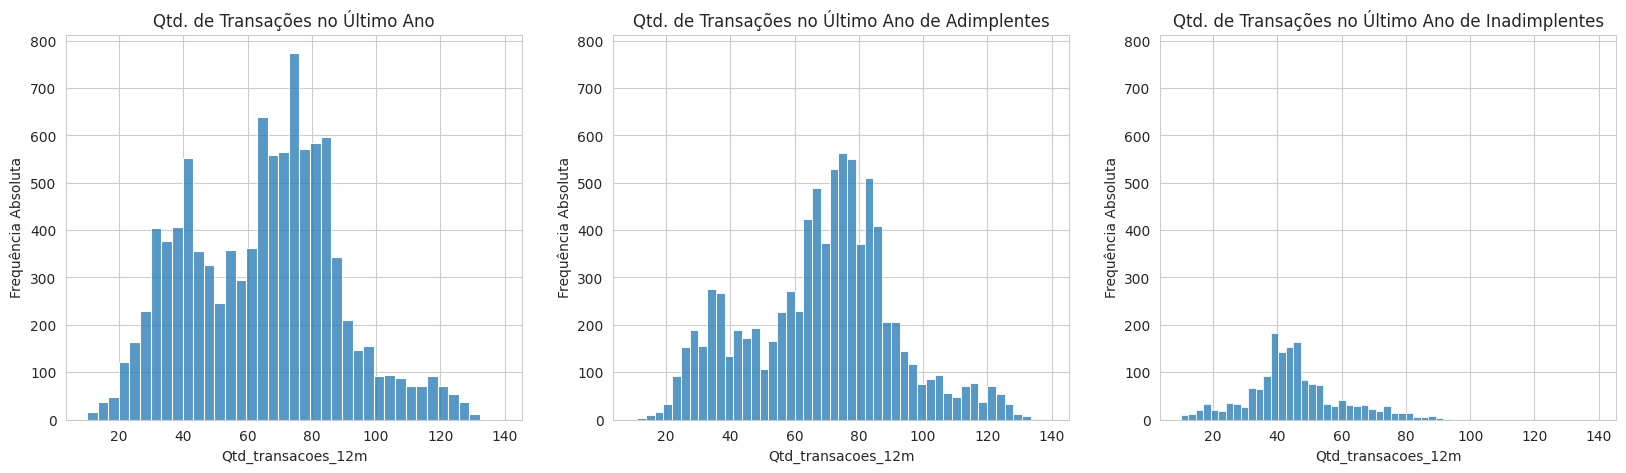

In [157]:
import numpy as np

# Substitua os valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_adimplente.replace([np.inf, -np.inf], np.nan, inplace=True)
df_inadimplente.replace([np.inf, -np.inf], np.nan, inplace=True)

coluna = 'qtd_transacoes_12m' 
titulos = [
    'Qtd. de Transações no Último Ano',
    'Qtd. de Transações no Último Ano de Adimplentes',
    'Qtd. de Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    _, max_y_f = f.get_ylim()
    max_y = max(max_y, max_y_f)
    f.set(ylim=(0, max_y))
    eixo += 1

plt.show()

# **A partir dos gráficos em coluna acima, extraímos as relações entre as frequências e as diferenças dos gráficos entre adimplentes e inadimplentes. Concluindo pela análise que os clientes adimplentes realizaram um maior volume de transações.

In [ ]:
#Nota: O código abaixo, apesar de ser igual ao descrito nas aulas, ñ rodou
f = sns.relplot(
x='valor_transacoes_12m',
y='qtd_transacoes_12m', 
data=df,
hue='default'
)
_ = f.set(
title='Relação entre Valor e Quantidade de Transações no Último Ano', 
xlabel='Valor das Transações no Último Ano',
ylabel='Quantidade das Transações no Último Ano')